In [1]:
import pandas as pd
import numpy as np
import imageio
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set_theme(style="ticks", palette="rocket_r", rc={
    'xtick.bottom': False,
    'ytick.left': False,
})


data = pd.read_pickle(r'/mnt/storage/danish/thesis/ADAPTIVE-THRESH/3dioumatch-org-danish/output/cfgs/kitti_models/pv_rcnn_ssl_60/consistant_dynamic_thresh_modeling_interval_32_3d77002/scores.pkl') # best_st_plot_60c84b7


## FIXED PARAMS

In [2]:
fg_gt_thresh = [0.7, 0.5, 0.5]
fg_pl_thresh = [0.65, 0.45, 0.4]
bg_gt_thresh = 0.25
class_map = {0:'Car',1:'Pedestrian',2:'Cyclist'}

In [3]:
stats = data


stats_dict = {
 'iou_roi_gt': stats['iou_roi_gt'],
 'iou_roi_pl': stats['iou_roi_pl'],
 'iteration' : stats['iteration'],
 'class_labels': stats['roi_labels'],
 'pred_scores': stats['pred_scores'],
 'iou_local_thresh_Car': stats['iou_local_thresh_Car'],
 'iou_local_thresh_Pedestrian': stats['iou_local_thresh_Pedestrian'],
 'iou_local_thresh_Cyclist': stats['iou_local_thresh_Cyclist']
}
stats_df = pd.DataFrame(stats_dict)
stats_df['type'] = 'none'
stats_df['epoch'] = (stats_df['iteration']) // 24 + 1

In [4]:
stats_df.head()

,iou_roi_gt,iou_roi_pl,iteration,class_labels,pred_scores,iou_local_thresh_Car,iou_local_thresh_Pedestrian,iou_local_thresh_Cyclist,type,epoch
0,0.755096,0.709440,0.0,2,0.992950,0.333333,0.333333,0.333333,none,1.0
1,0.000000,0.499350,0.0,2,0.315062,0.333333,0.333333,0.333333,none,1.0
2,0.510839,0.499374,0.0,2,0.811360,0.333333,0.333333,0.333333,none,1.0
3,0.000000,0.499350,0.0,2,0.565018,0.333333,0.333333,0.333333,none,1.0
4,0.000000,0.000000,0.0,1,0.065892,0.333333,0.333333,0.333333,none,1.0


In [5]:
grouped_df = stats_df.groupby('epoch')
grouped_df.head()

,iou_roi_gt,iou_roi_pl,iteration,class_labels,pred_scores,iou_local_thresh_Car,iou_local_thresh_Pedestrian,iou_local_thresh_Cyclist,type,epoch
0,0.755096,0.709440,0.0,2,0.992950,0.333333,0.333333,0.333333,none,1.0
1,0.000000,0.499350,0.0,2,0.315062,0.333333,0.333333,0.333333,none,1.0
2,0.510839,0.499374,0.0,2,0.811360,0.333333,0.333333,0.333333,none,1.0
3,0.000000,0.499350,0.0,2,0.565018,0.333333,0.333333,0.333333,none,1.0
4,0.000000,0.000000,0.0,1,0.065892,0.333333,0.333333,0.333333,none,1.0
...,...,...,...,...,...,...,...,...,...,...
383744,0.000000,0.669907,768.0,1,0.888648,0.488575,0.409350,0.427577,none,33.0
383745,0.669533,0.818003,768.0,1,0.980473,0.488575,0.409350,0.427577,none,33.0
383746,0.774459,0.669743,768.0,1,0.689187,0.488575,0.409350,0.427577,none,33.0
383747,0.000000,0.751231,768.0,1,0.965750,0.488575,0.409350,0.427577,none,33.0


In [6]:
for name, group in grouped_df:
    print("Group:", name)
    print(group['class_labels'].min(), group['class_labels'].max())
    #print()


Group: 1.0
1 3
Group: 2.0
1 3
Group: 3.0
1 3
Group: 4.0
1 3
Group: 5.0
1 3
Group: 6.0
1 3
Group: 7.0
1 3
Group: 8.0
1 3
Group: 9.0
1 3
Group: 10.0
1 3
Group: 11.0
1 3
Group: 12.0
1 3
Group: 13.0
1 3
Group: 14.0
1 3
Group: 15.0
1 3
Group: 16.0
1 3
Group: 17.0
1 3
Group: 18.0
1 3
Group: 19.0
1 3
Group: 20.0
1 3
Group: 21.0
1 3
Group: 22.0
1 3
Group: 23.0
1 3
Group: 24.0
1 3
Group: 25.0
1 3
Group: 26.0
1 3
Group: 27.0
1 3
Group: 28.0
1 3
Group: 29.0
1 3
Group: 30.0
1 3
Group: 31.0
1 3
Group: 32.0
1 3
Group: 33.0
1 3


In [7]:
p = sns.color_palette("muted")
p = sns.color_palette("muted")
sns.set_theme(style='dark')
palette = {'tp':p[2],'fp':p[0],'fn':p[3],'tn':p[1]}

## Fixed Threshold

In [8]:
#fg_gt_thresh = [0.7, 0.5, 0.5]
#class_map = {0:'Car',1:'Pedestrian',2:'Cyclist'}
frames_fixed = []
for name, group in grouped_df:
    fig, axes = plt.subplots(1,3, figsize=(30,13))
    for cind, class_name in class_map.items():
        cls_df = group[group['class_labels']==(cind+1)]
        
        gt_score = cls_df['iou_roi_gt']
        iou_score = cls_df['iou_roi_pl']

        classwise_fg_thr = fg_gt_thresh[cind] # scalar
        classwise_local_thr = fg_pl_thresh[cind] # scalar
        
        tp_mask = (gt_score >= classwise_fg_thr) & (iou_score >= classwise_local_thr)
        fp_mask = (gt_score < classwise_fg_thr) & (iou_score >= classwise_local_thr)
        fn_mask = (gt_score >= classwise_fg_thr) & (iou_score < classwise_local_thr)
        tn_mask = (gt_score < classwise_fg_thr) & (iou_score < classwise_local_thr)
        
        cls_df['type'][tp_mask] = 'tp'
        cls_df['type'][fp_mask] = 'fp'
        cls_df['type'][fn_mask] = 'fn'
        cls_df['type'][tn_mask] = 'tn'
        
        sns.histplot(ax=axes[cind],data=cls_df,x='iou_roi_pl',hue='type',multiple='stack',stat='proportion',bins=10,fill=True,alpha=0.8,palette=palette)
        
        axes[cind].set_title(f'Class: {class_name}   Epoch: {name}   FGT: {classwise_fg_thr}   LT: {classwise_local_thr}')
        fig.subplots_adjust(wspace=0.25, hspace=0.2)    
        axes[cind].grid(True, alpha=0.1)
                
    # draw the canvas, cache the renderer and collect as image
    fig.canvas.draw() 
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frames_fixed.append(image.reshape(fig.canvas.get_width_height()[::-1] + (3,)))
    plt.close()


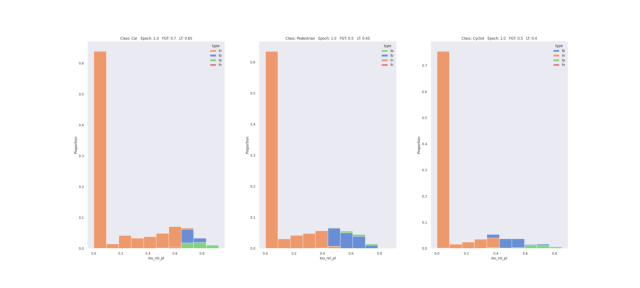

In [9]:
plt.imshow(np.array(frames_fixed[0]))
plt.axis('off')
plt.show()

In [10]:
imageio.mimsave('fixed_thresh.gif', frames_fixed, format='GIF', duration=1)

## Adaptive Threshold

In [11]:

#fg_gt_thresh = [0.7, 0.5, 0.5]
#class_map = {0:'Car',1:'Pedestrian',2:'Cyclist'}
frames_dynamic = []
for name, group in grouped_df:
    fig, axes = plt.subplots(1,3, figsize=(30,13))
    for cind, class_name in class_map.items():
        cls_df = group[group['class_labels']==(cind+1)]
        
        gt_score = cls_df['iou_roi_gt']
        iou_score = cls_df['iou_roi_pl']

        classwise_fg_thr = fg_gt_thresh[cind] # scalar
        classwise_local_thr = cls_df['iou_local_thresh_'+ class_name] # please note this is not a scalar
        mean_thr_per_epoch = classwise_local_thr.mean() # taken the mean of entire group (scalar)

        tp_mask = (gt_score >= classwise_fg_thr) & (iou_score >= classwise_local_thr)
        fp_mask = (gt_score < classwise_fg_thr) & (iou_score >= classwise_local_thr)
        fn_mask = (gt_score >= classwise_fg_thr) & (iou_score < classwise_local_thr)
        tn_mask = (gt_score < classwise_fg_thr) & (iou_score < classwise_local_thr)
        
        cls_df['type'][tp_mask] = 'tp'
        cls_df['type'][fp_mask] = 'fp'
        cls_df['type'][fn_mask] = 'fn'
        cls_df['type'][tn_mask] = 'tn'


        sns.histplot(ax=axes[cind],data=cls_df,x='iou_roi_pl',hue='type',multiple='stack',stat='proportion',bins=10,fill=True,alpha=0.8,palette=palette)
        
        axes[cind].set_title(f'Class: {class_name}   Epoch: {name}   FGT: {classwise_fg_thr}   *LT: {mean_thr_per_epoch:.3f}')
        fig.subplots_adjust(wspace=0.25, hspace=0.2)    
        axes[cind].grid(True, alpha=0.1)

    # draw the canvas, cache the renderer and collect as image                
    fig.canvas.draw()       
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frames_dynamic.append(image.reshape(fig.canvas.get_width_height()[::-1] + (3,)))
    plt.close()


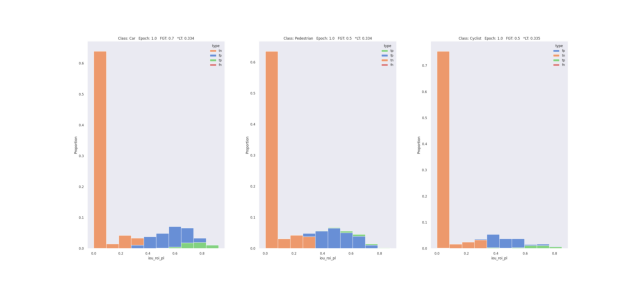

In [12]:
plt.imshow(np.array(frames_dynamic[0]))
plt.axis('off')
plt.show()

In [13]:
imageio.mimsave('dynamic_thresh.gif', frames_dynamic, format='GIF', duration=1)